___
# Projeto 3 - CD
___

## Regressão linear que agrupa diferentes tipos de músicas de acordo com sua dançabilidade.

O objetivo desse projeto é fazer diferentes agrupamentos de músicas do Spotify, utilizando a regressão linear, levando em consideração o quão dançável é a música. Queremos analisar o tamanho obtido e as diferenças das quantidades de músicas em determinados grupos.

Exemplo de aplicação da técnica: https://www.kaggle.com/noemir/dimension-reduction-of-music-pref-in-progress/comments 

**Nomes das integrantes:**
Rebeca Moreno,
Giulia Passarelli e
Carla Kim

## Parte 1: Dicionário dos Dados

In [7]:
from IPython.display import Image
Image(filename=('/Users/RebecaMoreno/Desktop/dic.png'))

FileNotFoundError: [Errno 2] No such file or directory: '/Users/RebecaMoreno/Desktop/dic.png'

In [8]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import expon
import seaborn as sns
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D

In [9]:
#lendo a planilha de dados
sptdata = pd.read_csv("data.csv")

#ajustando a quantidade de termos que precisamos usar
spotdata = sptdata[0:100]
spotdatatreina = sptdata[100:200]

FileNotFoundError: File b'data.csv' does not exist

In [ ]:
#criando uma nova coluna somente para o KEY CATEGÓRICO, ou seja, só com as notas (strings)
spotdata['notakey'] = spotdata.key
spotdata['notakey'] = spotdata['notakey'].astype('category')
l = ['C','C♯, D♭','D','D♯, E♭','E','F','F♯, G♭','G','G♯, A♭','A','A♯, B♭','B']
spotdata['notakey'].cat.categories = (l)
#criando uma nova coluna somente para o ENERGY CATEGÓRICO, ou seja, só com dois grupos (strings)
spotdata.energyy = spotdata.energy
#filtrando...
spotdata.energyy[(spotdata.energyy >= 0) & (spotdata.energyy < 0.5)] = [0]
spotdata.energyy[(spotdata.energyy >= 0.5) & (spotdata.energyy < 1)] = [1]
spotdata.energyy = spotdata.energyy.astype('category')
spotdata.energyy.cat.categories = (['Menos energética','Mais energética'])
#criando uma nova coluna somente para o MODE CATEGÓRICO, ou seja, só com os dois grupos (strings)
df = pd.DataFrame()
spotdata['tom'] = spotdata['mode']
spotdata['tom'] = spotdata.tom.astype('category')
spotdata.tom.cat.categories = (['Menor','Maior'])

#tabela de notas por energy
NotaEnergy = pd.crosstab(spotdata.notakey,spotdata.energyy, normalize=True, colnames=['Grau de energia'],rownames=['Notas musicais'])
NotaEnergy.plot(kind = 'bar',title = 'Notas x Energy',figsize=(13,7),color = ('purple','pink'),grid=False,subplots=True)
plt.ylabel('Frequência')
plt.show()

    Neste gráfico, podemos observar que, nesta lista de 100 músicas, são tocadas mais músicas energéticas do que o contrário, pois a quantidade de dados com a cor rosa é maior que a da cor roxa.
    Observamos também que a nota C#/D, por exemplo, tem uma tendência de ser tocada em músicas mais energéticas, enquanto que a nota mais frequente em músicas depressivas é a D. Portanto, caso se queira fazer uma música mais agitada ou menos elétrica assim, já é sabido qual a nota ideal para ser aceita pelo Spotify.

In [4]:
#tabela de  frequência das notas em cada tipo de tom
ut2 = pd.crosstab(spotdata.notakey,spotdata.tom, colnames=['Notas musicais'],margins=True)
ut2

NameError: name 'spotdata' is not defined

    Nesta tabela, vemos, não só a frequência de cada nota dentro das 100 músicas, como também a quantidade de vezes que esta nota foi usada em músicas com tom maior e menor. 
    Nela, vemos que, em músicas com tom maior, são frequentemente usadas as notas: D, C#/D e C. 
    Em contrapartida, em músicas com tom menor, são frequentemente usadas as notas: B, A#/B e F.   
    

In [5]:
#para o treinamento do computador dos 100 primeiros termos
spotdata['mode12key'] = spotdata['mode']*12 + spotdata['key']
spotdata['mode12key'] = np.where(spotdata.mode12key >= spotdata['mode12key'].mean(), 1, 0)
#para o teste dos novos termos de 100 a 200
spotdata['mode12keytreina'] = spotdatatreina['mode']*12 + spotdatatreina['key']
spotdata['mode12keytreina'] = np.where(spotdata.mode12keytreina >= spotdata['mode12keytreina'].mean(), 1, 0)

#plot do gráfico 
spotdata.plot(kind = "scatter", x = "danceability", y = "mode12key")

NameError: name 'spotdata' is not defined

In [6]:
spotdata["notas"]=spotdata["key"]    
spotdata['notas'] = spotdata['notas'].map({0: "C", 1: "C♯, D♭", 2: "D", 3: "D♯, E♭", 4: "E", 5: "F", 6: "F♯, G♭", 7: "G", 8: "G♯, A♭", 9: "A", 10: "A♯, B♭", 11: "B"})

fig, ax = plt.subplots()
colors = {'C':'lightgreen', 'C♯, D♭':'darkgreen', 'D':'lightblue', 'D♯, E♭':'darkblue', 'E':'yellow', 'F':'orange', 'F♯, G♭':'pink', 'G':'purple', 'G♯, A♭':'red', 'A':'brown', 'A♯, B♭':'gray', 'B':'black'}
ax.scatter(spotdata['danceability'], spotdata['mode12key'], c=spotdata['notas'].apply(lambda x: colors[x]))
plt.show()

# x = float(input('qual o grau de danceability?'))
# prob = logreg.predict_proba(x)

spotdata['mode12key'] = spotdata['mode']*12 + spotdata['key']
fig, ax = plt.subplots()
colors = {'C':'lightgreen', 'C♯, D♭':'darkgreen', 'D':'lightblue', 'D♯, E♭':'darkblue', 'E':'yellow', 'F':'orange', 'F♯, G♭':'pink', 'G':'purple', 'G♯, A♭':'red', 'A':'brown', 'A♯, B♭':'gray', 'B':'black'}
ax.scatter(spotdata['danceability'], spotdata['mode12key'], c=spotdata['notas'].apply(lambda x: colors[x]))
plt.show()

spotdata['mode12key'] = np.where(spotdata.mode12key >= spotdata['mode12key'].mean(), 1, 0)


NameError: name 'spotdata' is not defined

## Parte 3: Gráfico da regressão e da probabilidade

In [17]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
feature_cols = ['danceability']
X = spotdata[feature_cols]
y = spotdata['mode12key']
logreg.fit(X, y)
spotdata['mode12key_pred_class'] = logreg.predict(X)

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0          D
1     C♯, D♭
2          D
3          F
4          F
5     G♯, A♭
6     C♯, D♭
7     A♯, B♭
8          B
9          G
10         F
11    A♯, B♭
12         C
13         C
14         A
15    F♯, G♭
16    C♯, D♭
17         E
18    C♯, D♭
19    C♯, D♭
20    A♯, B♭
21    C♯, D♭
22         A
23         B
24    A♯, B♭
25         G
26         B
27    F♯, G♭
28         E
29    C♯, D♭
       ...  
70         C
71         C
72         E
73    A♯, B♭
74    A♯, B♭
75         B
76         G
77         A
78    D♯, E♭
79         D
80    G♯, A♭
81    A♯, B♭
82    C♯, D♭
83    F♯, G♭
84    A♯, B♭
85         F
86    C♯, D♭
87         G
88         F
89    C♯, D♭
90         B
91    C♯, D♭
92         C
93    C♯, D♭
94    F♯, G♭
95         A
96         C
97         A
98         B
99         A
Name: notakey, dtype: category
Categories (12, object): [C, C♯, D♭, D, D♯, E♭, ..., G♯, A♭, A, A♯, B♭, B]

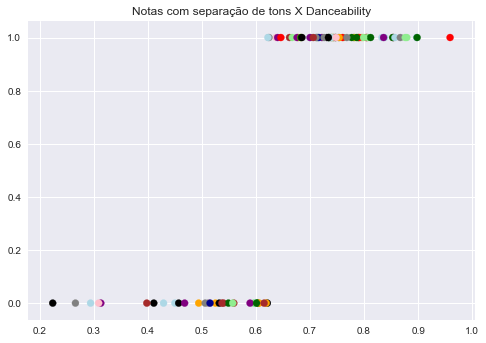

GRÁFICO DE REGRESSÃO LOGÍSTICA DE CADA NOTA POR DANCEABILITY


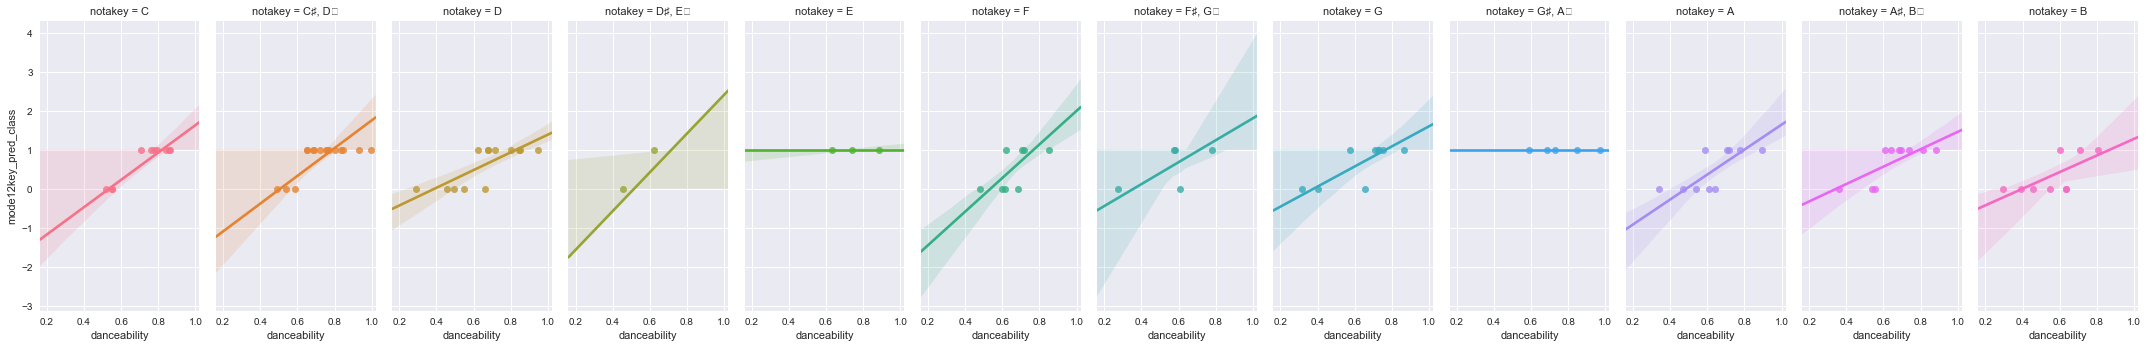

In [25]:
#gráfico dos dois grupos de tons (maior e menor) das notas de cada música por danceability
fig, ax = plt.subplots()
ax.scatter(spotdata['danceability'], spotdata['mode12key_pred_class'], c=spotdata['notas'].apply(lambda x: colors[x]))
plt.title('Notas com separação de tons X Danceability')
plt.xlabel('Notas em tom maior e menor')
plt.ylabel('')
plt.show()

#gráfico da regressão logística das notas de cada música baseada em danceability
print('GRÁFICO DE REGRESSÃO LOGÍSTICA DE CADA NOTA POR DANCEABILITY')
sns.lmplot(x="danceability", y="mode12key_pred_class", hue="notakey", col="notakey",data=spotdata, aspect=.5, x_jitter=.1)

    Este gráfico indica uma previsão do programa com relação às músicas de forma que, músicas mais dançantes possuem maior probabilidade de serem de tons maiores. Assim, de acordo com o gráfico obtido anteriormente de frequência das notas com relação aos tons, temos que essas notas provavelmente são: D, C#/D, C ou G, respectivamente. Já os menos dançantes, provavelmente são: B, A#/B, F e C#/D, respectivamente.

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


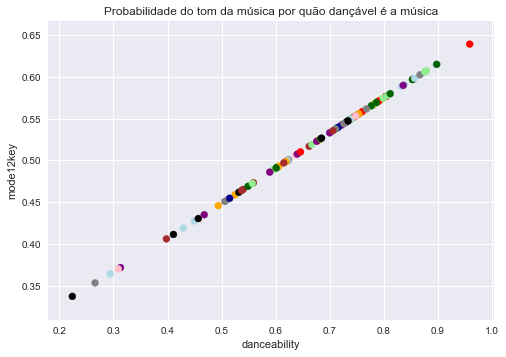

In [28]:
#gráfico da probabilidade por danceability
spotdata['mode12key_pred_prob'] = logreg.predict_proba(X)[:, 1]

fig, ax = plt.subplots()
ax.scatter(spotdata['danceability'], spotdata['mode12key_pred_prob'], c=spotdata['notas'].apply(lambda x: colors[x]))
plt.title('Probabilidade do tom maior (com notas) X Danceability')
plt.xlabel('Danceability')
plt.ylabel('Probabilidade do tom maior (com notas)')
plt.show()

    O gráfico acima comprova que, para dançabilidades baixas, a probalidade maior é que o tom da música seja mais baixo e vice-versa.

In [27]:
# examine some example predictions
print(logreg.predict_proba(0.2))
print(logreg.predict_proba(0.5))
print(logreg.predict_proba(0.8))

[[ 0.67173525  0.32826475]]
[[ 0.55153401  0.44846599]]
[[ 0.4249947  0.5750053]]


    A primeira coluna diz respeito ao grupo de notas com o tom menor, mostrando a exata chance de se ter, por exemplo, uma dançabilidade de 0.2 com o tom menor. No caso da danceability ser igual a 0.2, a probabilidade de se ter tal danceability com tom menor é 0.67173525. Enquanto que, na segunda coluna, temos as mesmas informações, porém referentes ao grupo de notas com tom maior.

In [29]:
spotdata['mode12key'] = spotdata['mode']*12 + spotdata['key']
# print(spotdata['notakey'])

dance = 0.833

for i in range(len(spotdata)):
    if dance = spotdata['danceability'][i]:
        print(spotdata['notakey'][i])
    
spotdata['mode12key'] = np.where(spotdata.mode12key >= spotdata['mode12key'].mean(), 1, 0)

SyntaxError: invalid syntax (<ipython-input-29-750fdf1b42d1>, line 7)

In [1]:
spotdata['mode12key'] = spotdata['mode']*12 + spotdata['key']
# print(spotdata['notakey'])

dance = 0.8

for i in range(len(spotdata)):
    if dance == spotdata['danceability'][i]:
        print(spotdata['notakey'][i])
    
spotdata['mode12key'] = np.where(spotdata.mode12key >= spotdata['mode12key'].mean(), 1, 0)

NameError: name 'spotdata' is not defined

## Parte 4: Realizando a regressão e Encontrando o beta

In [ ]:
#train_cols = spotdata.columns[1:]

logit = sm.Logit(spotdata['danceability'], spotdata['mode12key_pred_class'])
result = logit.fit()
print(result)

logit2 = sm.Logit(spotdata['danceability'], spotdata['mode12key'])
result2 = logit2.fit()
print(result2)

logit3 = sm.Logit(spotdata['danceability'], spotdata['energy'])
result3 = logit3.fit()
print(result3)

#logit4 = sm.Logit(spotdata['danceability'], spotdata['k'])
#result4 = logit4.fit()
#print(result4)

In [ ]:
print (result.summary())
print (result2.summary())
print (result3.summary())

In [ ]:
print (result.conf_int())
print (result2.conf_int())
print (result3.conf_int())

In [ ]:
print (np.exp(result.params))
print (np.exp(result2.params))
print (np.exp(result3.params))

In [ ]:
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print (np.exp(conf))

In [ ]:
params = result2.params
conf2 = result2.conf_int()
conf2['OR'] = params
conf2.columns = ['2.5%', '97.5%', 'OR']
print (np.exp(conf2))

In [ ]:
params = result3.params
conf3 = result3.conf_int()
conf3['OR'] = params
conf3.columns = ['2.5%', '97.5%', 'OR']
print (np.exp(conf3))

In [ ]:
dummy_ranks = pd.get_dummies(spotdata['energy'], prefix='energy')
print (dummy_ranks.head())
#trasnformar energy em binarios, ou seja, eh energetico ou nao

In [ ]:
cols_to_keep = ['mode','danceability', 'mode12key']
dataff = spotdata[cols_to_keep].join(dummy_ranks.ix[:, 'energy_0':])
print (dataff.head())
#ordenando as informaoes, com o MODE, tom, como a variavel que queremos descobrir

In [ ]:
dataff['intercept'] = 1.0

In [ ]:
import statsmodels.api as sm
train_cols = dataff.columns[1:]
logitt = sm.Logit(dataff['mode'], dataff[train_cols])
resultt = logitt.fit()

In [ ]:
print (resultt.summary())

In [ ]:
print (resultt.conf_int())

In [ ]:
print (np.exp(result.params))